***STEPS IN BUILDING BERT MODEL***

**Tokenization**

1. Just like other model, we need to convert the sentences into the tokens (encoded words which will be in the form of numbers)

  * Adding special tokens (CLS and SEP). CLS is added in begining and SEP is added at the end.

    eg: [CLS] Sentence A [SEP] Sentence B [SEP]

  * Then these sentences with special tokens are converted into sequence of numbers.

  * Then apply padding to make all tweets (each row) into same length.

  The output will be 'input_ids', 'token_type_ids', 'attention_mask'.

  * 'input_ids'- These are the actual words which are converted into numbers.

  * 'token_type_ids'-  The token_type_ids tensor is used to indicate which tokens belong to the first sentence and which ones belong to the second sentence in a pair of sentences. 
  
  For example, in the sentence pair "I have a dog. He is friendly.", the token_type_ids for "I" and "have" would be 1, and for "He" and "is" would be 2.

  * 'attention_mask' - These are the masked tokens

  For example, The [MASK] is playing with his ball.

    After masking the above sentence -[1,0,1,1,1,1]

  Target output (original masked tokens):
  The dog is playing with his ball.

**Dataloader**

We can not load all the inputs (no of tweets) at once. If we do so, we need more memory and it will be computationally expensive.To solve this, we can convert the entire inputs into number of batches

Example :If we have 1000 inputs and if we create 10 batches. Then each batch will contain 100 inputs.

  * In normal ML model, we will have dependent and indipendent features to train our model. In our case, we have converted only the text into tokens (numbers). So, how to bind the labels (target) with the indipendent feature(text in our case).

  * For that we are using `TensorDataset`, it will convert the tensors into dataset or dataframe.we have to give input like 'tokens and labels'.

  * Then we are using `DataLoader` to split the inputs into batches

**Defining model**

* Defining optimizer
* Defining sheduler

**Training**

Set model to training mode `model.train()`

Iterating from dataloader

set gradient to zero  `model.zero_grad()`

Load inputs into GPU (else into CPU)

Giving input and getting output

calculate slope/ derivatinve of loss  `loss.backward`

use optimizer `optimizer.step()`

use scheduler `scheduler.step()`

`
        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 60.1 MB/s eta 0:00:00


In [5]:
data=pd.read_csv("smile-annotations-final.csv")
data

,611857364396965889,@aandraous @britishmuseum @AndrewsAntonio Merci pour le partage! @openwinemap,nocode
0,614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy
1,614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,happy
2,614877582664835073,@Sofabsports thank you for following me back. ...,happy
3,611932373039644672,@britishmuseum @TudorHistory What a beautiful ...,happy
4,611570404268883969,@NationalGallery @ThePoldarkian I have always ...,happy
...,...,...,...
3079,613678555935973376,MT @AliHaggett: Looking forward to our public ...,happy
3080,613294681225621504,@britishmuseum Upper arm guard?,nocode
3081,615246897670922240,@MrStuchbery @britishmuseum Mesmerising.,happy
3082,613016084371914753,@NationalGallery The 2nd GENOCIDE against #Bia...,not-relevant


In [6]:
data.rename(columns={"nocode":"emotion"},inplace=True)

In [7]:
data["emotion"].value_counts()

nocode               1571
happy                1137
not-relevant          214
angry                  57
surprise               35
sad                    32
happy|surprise         11
happy|sad               9
disgust|angry           7
disgust                 6
sad|disgust             2
sad|angry               2
sad|disgust|angry       1
Name: emotion, dtype: int64

In [8]:
#Considering columns which has only valid emotions
df = data[~data.emotion.str.contains('\|')]
df = df[df.emotion != 'nocode']

In [9]:
df.emotion.value_counts()

happy           1137
not-relevant     214
angry             57
surprise          35
sad               32
disgust            6
Name: emotion, dtype: int64

In [10]:
labels=df.emotion.unique()
labels

array(['happy', 'not-relevant', 'angry', 'disgust', 'sad', 'surprise'],
      dtype=object)

In [11]:
label_dict = {}
for index, possible_label in enumerate(labels):
    label_dict[possible_label] = index

label_dict

{'happy': 0,
 'not-relevant': 1,
 'angry': 2,
 'disgust': 3,
 'sad': 4,
 'surprise': 5}

In [12]:
df['label'] = df["emotion"].replace(label_dict)
df

,611857364396965889,@aandraous @britishmuseum @AndrewsAntonio Merci pour le partage! @openwinemap,emotion,label
0,614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy,0
1,614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,happy,0
2,614877582664835073,@Sofabsports thank you for following me back. ...,happy,0
3,611932373039644672,@britishmuseum @TudorHistory What a beautiful ...,happy,0
4,611570404268883969,@NationalGallery @ThePoldarkian I have always ...,happy,0
...,...,...,...,...
3077,611258135270060033,@_TheWhitechapel @Campaignforwool @SlowTextile...,not-relevant,1
3078,612214539468279808,“@britishmuseum: Thanks for ranking us #1 in @...,happy,0
3079,613678555935973376,MT @AliHaggett: Looking forward to our public ...,happy,0
3081,615246897670922240,@MrStuchbery @britishmuseum Mesmerising.,happy,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


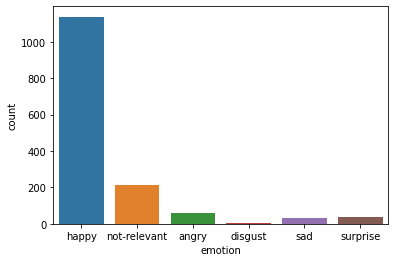

In [13]:
sns.countplot(df["emotion"])

In [14]:
df.rename(columns={"@aandraous @britishmuseum @AndrewsAntonio Merci pour le partage! @openwinemap":"tweet"},inplace=True)

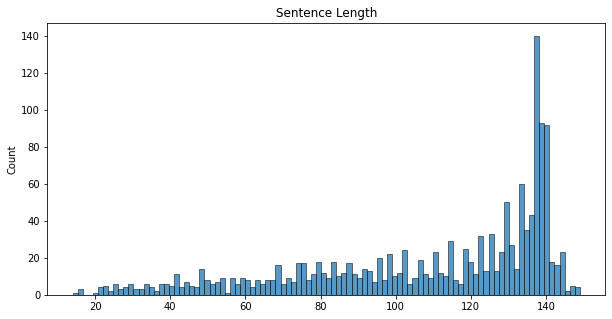

In [19]:
#plot hist of sentence length
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df["tweet"]], bins=100)
plt.title('Sentence Length')
plt.show()

In [15]:
#find the maximum length
max_len = max([len(sent) for sent in df["tweet"]])
print('Max length: ', max_len)

Max length:  149


In [16]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_test, y_train, y_test = train_test_split(df["tweet"], 
                                                   df["label"],
                                                   test_size = 0.15,
                                                   random_state = 17,
                                                   stratify = df["label"])

In [17]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)

In [18]:
train=pd.DataFrame({"Text":X_train,"emotion":y_train})
test= pd.DataFrame({"Text":X_test,"emotion":y_test})

Just like the other models, we have to convert the words into vectors. For that purpose we are using a bert method to do that task.

STEPS:

1.Adding special tokens (CLS and SEP). CLS is added in begining and SEP is added at the end.

eg: [CLS] Sentence A [SEP] Sentence B [SEP]

2.Then we are converting the sentences into a sequence of number

3.Also doing the masking operation, the output will be pytorch tensors

In [ ]:
#encode train set
#Converting each tweet into a sequence of numbers with the length of 150
#Output will be a dictionary of input_ids, token_type_ids and attention_mask
#Attention mask contains 0 as masked token and 1 as real token
encoded_data_train = tokenizer.batch_encode_plus(train["Text"].values,          
                                                add_special_tokes = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 150,
                                                return_tensors = 'pt')
                                                
#encode validation set
encoded_data_val = tokenizer.batch_encode_plus(test["Text"].values,
                                                add_special_tokes = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 150,
                                                return_tensors = 'pt')

In [20]:
encoded_data_train

{'input_ids': tensor([[  101,  1030,  4459,  ...,     0,     0,     0],
        [  101,  1030, 12323,  ...,     0,     0,     0],
        [  101,  1037,  2261,  ...,     0,     0,     0],
        ...,
        [  101,  1030,  2329,  ...,     0,     0,     0],
        [  101,  1030, 12869,  ...,     0,     0,     0],
        [  101,  1012,  1030,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [21]:
import torch
#train set
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train["emotion"].values)

#validation set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(test["emotion"].values)

In [22]:
labels_train

tensor([0, 0, 0,  ..., 0, 0, 2])

Now we will set up our BERT model through 4 steps:

1.Load Pre-trained BERT

2.Create DataLoader

3.Set up optimizer

4.Set up scheduler

In [23]:
#1.Loading pre-trained model
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [24]:
#2.Create dataloader
from torch.utils.data import TensorDataset

#train set
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

#validation set
dataset_val = TensorDataset(input_ids_val, 
                             attention_masks_val, 
                             labels_val)

In [25]:
#Creating iterator for ourdataset to save memory during training and boost the training speed.
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32

#train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#validation set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = batch_size)

* Optimizers are used in BERT (and in deep learning in general) to update the model parameters in the direction that minimizes the loss function. 

* Schedulers are used to adjust the learning rate during training, typically reducing the learning rate over time so that the optimizer can converge more efficiently to the optimal solution. 

* By using an optimizer and a scheduler, the model can converge faster and achieve better results than if only one or the other is used.

In [26]:
#setup optimizer and scheduler
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8) 
                 
epochs = 15

scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps = len(dataloader_train)*epochs)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [27]:
device = torch.device("cpu")
def evaluate(dataloader_val):

    #evaluation mode 
    model.eval()
    
    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        #load into GPU
        batch = tuple(b.to(device) for b in batch)
        
        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}

        #compute logits
        with torch.no_grad():        
            outputs = model(**inputs)
        
        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy() #converting tensors to numpy array
        label_ids = inputs['labels'].cpu().numpy() #converting tensors to numpy array
        predictions.append(logits)
        true_vals.append(label_ids)
    
    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [28]:
import numpy as np
from sklearn.metrics import f1_score,accuracy_score

def f1_score_func(labels,preds):
    preds = np.argmax(preds, axis = 1)
    return f1_score(labels, preds, average = 'weighted')

def accuracy_score_func(labels,preds):
    preds = np.argmax(preds, axis = 1)
    return accuracy_score(labels, preds)

In [29]:
import random
import numpy as np

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
'''
for epoch in range(1, epochs+1):
    
    model.train()

    accumulation_steps = 10
    
    loss_train_total = 0
    
    steps=0
    
    for input_ids,attention_masks,labels in dataloader_train:
        
        model.zero_grad() #set gradient to 0
        #since we are processing batch by batch, we set gradiant to zero initially.If we does not set to zero, then while computing gradient for 2nd batch
        #New gradient=1st batch gradient + 2nd batch gradient, to avoid this, we set gradient to zero
    
        
        #define inputs and loading it into CPU
        inputs = {'input_ids':input_ids.to(device),
                  'attention_mask':attention_masks.to(device),    #input=In simply,this a single tweet posted by a person
                  'labels':labels.to(device)}
        
        outputs = model(**inputs) #unpack the dict straight into inputs
        #output=(loss,logits)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        if (steps + 1) % accumulation_steps == 0:
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()
            model.zero_grad()
        else:
            loss.backward()
        steps += 1
        #loss.backward() #computes the gradients of the loss with respect to the model parameters / slope 
        
        #torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) # This make sure that gradient value does not exceed more than 1
        
        #optimizer.step() # calculate new_weight=old_weight- learning rate * derivative of loss
        #scheduler.step() # It is used to update the learning rate of the optimizer
        
    torch.save(model.state_dict(), f'Models/ BERT_ft_epoch{epoch}.model')
    
    taining_loss = loss_train_total / len(dataloader_train)
    loss_val_avg, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)

    print('Epoch :',epoch)
    print('Training loss :', taining_loss)
    print('Validation loss :', loss_val_avg)
    print('F1 Score (weighted) :',val_f1)
    '''

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0
    
    progress_bar = tqdm(dataloader_train, 
                        desc = 'Epoch {:1d}'.format(epoch), 
                        leave = False, 
                        disable = False)
    
    #for input_ids,attention_masks,labels in progress_bar:
    for batch in progress_bar:

        
        model.zero_grad() #set gradient to 0
        #since we are processing batch by batch, we set gradient to zero else gradient2=gradient1+gradient2(This should not happen)
    
        #load into GPU
        batch = tuple(b.to(device) for b in batch)
        
        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}
        
        outputs = model(**inputs) #unpack the dict straight into inputs
        #outputs=(loss,logits)
        
        loss = outputs[0]
        loss_train_total += loss.item() #Example : loss_train_total=tensor(3) if we use loss.item then loss_train_total=3
        loss.backward() #calculates slope / gradient with respect to loss
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) # It prevent the value of gradient not exeeding 1
        
        optimizer.step() #updating parameters/ weights
        scheduler.step() #Updating learning rate
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item() / len(batch))})


        
    torch.save(model.state_dict(),'/content/drive/My Drive/Models/BERT_ft_epoch{0}.model'.format(epoch))
    
    tqdm.write('\n Epoch {epoch}')   
    loss_train_avg = loss_train_total / len(dataloader_train)
    tqdm.write('Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(true_vals,predictions)
    accuracy=accuracy_score_func(true_vals,predictions)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')
    tqdm.write(f'Accuracy: {accuracy}')

  0%|          | 0/15 [33:37<?, ?it/s]


 Epoch {epoch}
Training loss: {loss_train_avg}



  7%|▋         | 1/15 [35:34<8:18:05, 2134.67s/it]

Validation loss: 0.7640282000814166
F1 Score (weighted): 0.7218046319099609
Accuracy: 0.7937219730941704



  7%|▋         | 1/15 [1:08:44<8:18:05, 2134.67s/it]


 Epoch {epoch}
Training loss: {loss_train_avg}



 13%|█▎        | 2/15 [1:10:40<7:38:53, 2117.96s/it]

Validation loss: 0.6119470468589238
F1 Score (weighted): 0.7705324183038922
Accuracy: 0.8116591928251121



 13%|█▎        | 2/15 [1:43:47<7:38:53, 2117.96s/it]


 Epoch {epoch}
Training loss: {loss_train_avg}



 20%|██        | 3/15 [1:45:42<7:02:04, 2110.39s/it]

Validation loss: 0.5986088003431048
F1 Score (weighted): 0.7810979752683789
Accuracy: 0.820627802690583



 20%|██        | 3/15 [2:18:49<7:02:04, 2110.39s/it]


 Epoch {epoch}
Training loss: {loss_train_avg}



 27%|██▋       | 4/15 [2:20:50<6:26:43, 2109.44s/it]

Validation loss: 0.5883300474711827
F1 Score (weighted): 0.7913155090931329
Accuracy: 0.8295964125560538



 27%|██▋       | 4/15 [2:54:21<6:26:43, 2109.44s/it]


 Epoch {epoch}
Training loss: {loss_train_avg}



 33%|███▎      | 5/15 [2:56:20<5:52:48, 2116.82s/it]

Validation loss: 0.5834192676203591
F1 Score (weighted): 0.7963046400076895
Accuracy: 0.8340807174887892



 33%|███▎      | 5/15 [3:29:38<5:52:48, 2116.82s/it]


 Epoch {epoch}
Training loss: {loss_train_avg}



 40%|████      | 6/15 [3:31:36<5:17:30, 2116.77s/it]

Validation loss: 0.5862204028027398
F1 Score (weighted): 0.7950694050121404
Accuracy: 0.8295964125560538



 40%|████      | 6/15 [4:04:39<5:17:30, 2116.77s/it]


 Epoch {epoch}
Training loss: {loss_train_avg}



 47%|████▋     | 7/15 [4:06:34<4:41:24, 2110.60s/it]

Validation loss: 0.5709201736109597
F1 Score (weighted): 0.7925583534552145
Accuracy: 0.8251121076233184



 47%|████▋     | 7/15 [4:39:07<4:41:24, 2110.60s/it]


 Epoch {epoch}
Training loss: {loss_train_avg}



 53%|█████▎    | 8/15 [4:41:03<4:04:39, 2097.14s/it]

Validation loss: 0.5875080951622554
F1 Score (weighted): 0.7891540510468998
Accuracy: 0.820627802690583



 53%|█████▎    | 8/15 [5:13:48<4:04:39, 2097.14s/it]


 Epoch {epoch}
Training loss: {loss_train_avg}



 60%|██████    | 9/15 [5:15:43<3:29:11, 2091.98s/it]

Validation loss: 0.5836420697825295
F1 Score (weighted): 0.7836854247129267
Accuracy: 0.8116591928251121



Epoch 10:  82%|████████▎ | 33/40 [27:24<05:44, 49.22s/it, training_loss=0.095]

Runtime got disconnected after 9th epoch.So, i am considering the parameters in 8th epoch. Finally we have achieved an accuracy of 82%. 

To imporve the model performance further, we can add some extra layers on top of bert.

In [30]:
model.load_state_dict(torch.load('/content/drive/My Drive/Models/BERT_ft_epoch8.model'))

<All keys matched successfully>